# Imports and Installing Dependencies

In [2]:
import os 
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
df=pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv','train.csv'))

In [4]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df.iloc[3]['comment_text']

'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

In [6]:
df[df.columns[2:]].iloc[3]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 3, dtype: int64

# 1. Preprocessing

In [7]:
from tensorflow.keras .layers import TextVectorization

In [8]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [9]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [10]:
df['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [11]:
MAX_FEATURES=20000 # Number of the words in the vocab

In [12]:
vectorizer=TextVectorization(max_tokens=MAX_FEATURES,
                            output_sequence_length=1800,
                            output_mode='int')

In [13]:
type(X),type(X.values)

(pandas.core.series.Series, numpy.ndarray)

In [14]:
vectorizer.adapt(X.values)

In [15]:
# vectorizer.get_vocabulary()

In [16]:
vectorizer("hello World,Life is Great")[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([286,   1,   9, 275,   0], dtype=int64)>

In [17]:
TextVectorization??

In [18]:
vectorizer_text=vectorizer(X.values)

In [19]:
vectorizer_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[ 643,   76,    2, ...,    0,    0,    0],
       [   1,   54, 2506, ...,    0,    0,    0],
       [ 425,  440,   70, ...,    0,    0,    0],
       ...,
       [   1, 7329,  383, ...,    0,    0,    0],
       [   5,   12,  533, ...,    0,    0,    0],
       [   5,    8,  130, ...,    0,    0,    0]], dtype=int64)>

In [20]:
len(X)

159571

In [21]:
# MCSHBAP=map,cache,shuffle,batch,prefetch
dataset=tf.data.Dataset.from_tensor_slices((vectorizer_text, y))
dataset=dataset.cache()
dataset=dataset.shuffle(160000)
dataset=dataset.batch(16)
dataset=dataset.prefetch(8) # helps prevent bottlenecksdatas

In [22]:
batch_X,batch_y=dataset.as_numpy_iterator().next()

In [23]:
batch_X.shape,batch_y.shape

((16, 1800), (16, 6))

In [24]:
len(dataset)

9974

In [25]:
train=dataset.take(int(len(dataset)*.7))
val=dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test=dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [26]:
len(train),len(val),len(test)

(6981, 1994, 997)

In [27]:
train_generator=train.as_numpy_iterator()


In [28]:
train_generator.next()

(array([[  8,  19, 126, ...,   0,   0,   0],
        [  8, 522,  11, ...,   0,   0,   0],
        [  2,   1,  43, ...,   0,   0,   0],
        ...,
        [103,  34, 290, ...,   0,   0,   0],
        [ 14,  78, 238, ...,   0,   0,   0],
        [150, 410,   1, ...,   0,   0,   0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

# 2. Create Sequential Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Bidirectional,Dense,Embedding

In [32]:
model= Sequential()
# Create the Embedding Layer
model.add(Embedding(MAX_FEATURES+1,32))
# Bidirectional LSTM layer
model.add(Bidirectional(LSTM(32,activation='tanh')))
# Feature Exttractor Dense (Fully Connected layers)
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
# Final Layer
model.add(Dense(6,activation='sigmoid'))

In [36]:
model.compile(loss='BinaryCrossentropy',optimizer='Adam')


In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          640032    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                      

In [37]:
history=model.fit(train,epochs=1,validation_data=val)

6981/6981 [==============================] - 4828s 690ms/step - loss: 0.0636 - val_loss: 0.0540


In [39]:
from matplotlib import pyplot as plt 

<Figure size 576x360 with 0 Axes>

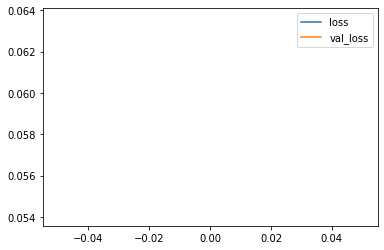

In [40]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# 3. Make Predictions

In [41]:
input_text=vectorizer("You freaking suck! ")

In [42]:
batch=test.as_numpy_iterator().next()

In [43]:
bacth_X,batch_y=test.as_numpy_iterator().next()

In [44]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [45]:
res=model.predict(np.expand_dims(input_text,0))

#  4. Evaluate Model

In [46]:
from tensorflow.keras.metrics import Precision,Recall ,CategoricalAccuracy

In [52]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [53]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

In [54]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.7427334785461426, Recall:0.7133947014808655, Accuracy:0.45336008071899414


# 5. Test and Gradio

In [55]:
!pip install gradio jinja2

     ---------------------------------------- 2.9/2.9 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 54.5/54.5 KB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 53.6/53.6 KB 2.7 MB/s eta 0:00:00
  Using cached pycryptodome-3.14.1-cp35-abi3-win_amd64.whl (1.8 MB)
     -------------------------------------- 212.1/212.1 KB 3.2 MB/s eta 0:00:00
  Using cached aiohttp-3.8.1-cp38-cp38-win_amd64.whl (555 kB)
     -------------------------------------- 184.4/184.4 KB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 84.5/84.5 KB 2.3 MB/s eta 0:00:00
  Using cached multidict-6.0.2-cp38-cp38-win_amd64.whl (28 kB)
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
  Using cached aiosignal-1.2.0-py3-none-any.whl (8.2 kB)
  Using

In [57]:
import tensorflow as tf
import gradio as gr

c:\users\moham\desktop\faseeh\comment toxicity\ctoxic\lib\site-packages\paramiko\transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [58]:
model.save('Comment_toxicity.h5')

In [59]:
model=tf.keras.models.load_model('toxicity.h5')

In [60]:
input_str=vectorizer('Hey I freaken hate you')

In [62]:
res=model.predict(np.expand_dims(input_str,0))

In [63]:
res

array([[0.8654419 , 0.0356873 , 0.4453451 , 0.02464375, 0.44171998,
        0.08360171]], dtype=float32)

In [64]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [65]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

In [66]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860/
Running on public URL: https://34626.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x1c1d9ad68e0>,
 'http://127.0.0.1:7860/',
 'https://34626.gradio.app')